# Word Cloud
Analyze the Amazon Alexa dataset and build word cloud for the sentiment of a given input sentence is positive or negative.

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Resources/amazon_alexa .tsv", sep="\t", encoding='utf-8')
print(f"Data Shape: {df.shape}")

Data Shape: (3150, 5)


In [3]:
df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [4]:
df.value_counts(df['feedback'])

feedback
1    2893
0     257
Name: count, dtype: int64

In [5]:
stop_words = set(stopwords.words('english'))

In [6]:
pre_postivie_review = df[df['feedback']==1]['verified_reviews'].astype(str).str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
pre_negative_review = df[df['feedback']==0]['verified_reviews'].astype(str).str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [7]:
positive_review = ' '.join([review.encode('utf-8').decode('ascii', 'ignore') for review in pre_postivie_review])
negative_review = ' '.join([review.encode('utf-8').decode('ascii', 'ignore') for review in pre_negative_review])

In [8]:
print("Snippet of Positive Review: ",positive_review[:100])
print("Snippet of Negative Review: ",negative_review[:100])

Snippet of Positive Review:  love echo! loved it! sometimes playing game, answer question correctly alexa says got wrong answers 
Snippet of Negative Review:  like siri, fact, siri answers accurately alexa. see real need household, though good bargain prime d


## Word Clouds

(-0.5, 799.5, 399.5, -0.5)

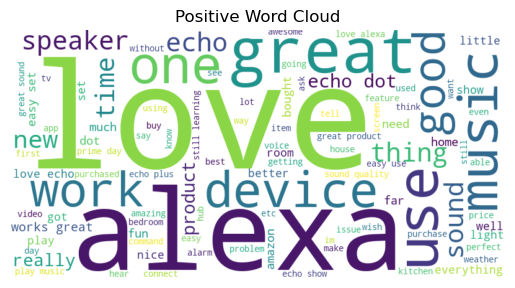

In [9]:
positive_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(positive_review)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Word Cloud")
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

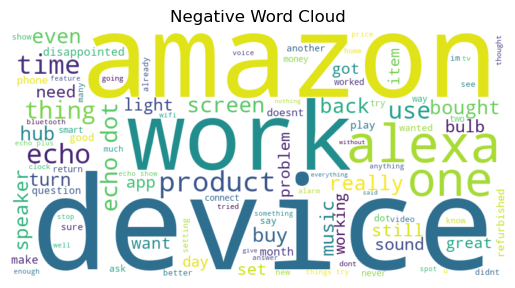

In [10]:
negative_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(negative_review)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Word Cloud")
plt.axis('off')